In [1]:
import pandas as pd

In [2]:
import numpy as np


def calculate_distance(point1, point2):
    return np.linalg.norm(np.array(point2) - np.array(point1))


def determine_grid_circle_range(grid_x_id, grid_y_id, total_grid=16):
    grid_x_id += 0.5
    grid_y_id += 0.5
    mid_x_grid = total_grid / 2
    mid_y_grid = total_grid / 2
    dist = calculate_distance((grid_x_id, grid_y_id), (mid_x_grid, mid_y_grid))
    # print(dist)
    # floor the distance to get the circle range
    return int(np.floor(dist))

In [3]:
traffic_road_df_path = "/Users/user/Documents/Coding/cro_location_intelligence/notebook/data_7_eleven/data_7_eleven.csv"

traffic_road_df = pd.read_csv(traffic_road_df_path)
traffic_road_df.head()

,store_id,grid_lat_id,grid_lon_id,green_wkday_12,orange_wkday_12,red_wkday_12,maroon_wkday_12,green_wkday_18,orange_wkday_18,red_wkday_18,...,road_length_platform,road_length_stop,road_length_passing_place,road_length_no,road_length_abandoned,road_length_traffic_signals;crossing,road_length_crossing;bus_stop,road_length_proposed,road_length_toll_gantry,road_length_junction
0,8375,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8375,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8375,2.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8375,3.0,0.0,0.031559,0.007267,0.0,0.0,0.026161,0.011627,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8375,4.0,0.0,0.025746,0.044640,0.0,0.0,0.071838,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# use grid_lat_id grid_lon_id to determine the circle range
traffic_road_df["circle_range"] = traffic_road_df.apply(
    lambda x: determine_grid_circle_range(x["grid_lat_id"], x["grid_lon_id"], 16),
    axis=1,
)
traffic_road_df.head()

,store_id,grid_lat_id,grid_lon_id,green_wkday_12,orange_wkday_12,red_wkday_12,maroon_wkday_12,green_wkday_18,orange_wkday_18,red_wkday_18,...,road_length_stop,road_length_passing_place,road_length_no,road_length_abandoned,road_length_traffic_signals;crossing,road_length_crossing;bus_stop,road_length_proposed,road_length_toll_gantry,road_length_junction,circle_range
0,8375,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,8375,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
2,8375,2.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
3,8375,3.0,0.0,0.031559,0.007267,0.0,0.0,0.026161,0.011627,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,8375,4.0,0.0,0.025746,0.044640,0.0,0.0,0.071838,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [5]:
# drop data that have circle range >= 8
traffic_road_df = traffic_road_df[traffic_road_df["circle_range"] < 8]
traffic_road_df["circle_range"].unique()

array([7, 6, 5, 4, 3, 2, 1, 0])

In [6]:
# merge data same store_id and circle_range
traffic_road_df = (
    traffic_road_df.groupby(["store_id", "circle_range"]).mean().reset_index()
)
print(traffic_road_df.shape)
traffic_road_df.head()

(88440, 73)


,store_id,circle_range,grid_lat_id,grid_lon_id,green_wkday_12,orange_wkday_12,red_wkday_12,maroon_wkday_12,green_wkday_18,orange_wkday_18,...,road_length_platform,road_length_stop,road_length_passing_place,road_length_no,road_length_abandoned,road_length_traffic_signals;crossing,road_length_crossing;bus_stop,road_length_proposed,road_length_toll_gantry,road_length_junction
0,7,0,7.5,7.5,0.104591,0.011835,0.000000,0.000000,0.029171,0.070281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,1,7.5,7.5,0.049207,0.011342,0.000078,0.000701,0.026939,0.032883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2,7.5,7.5,0.039677,0.006696,0.000000,0.000000,0.028331,0.024209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,3,7.5,7.5,0.026389,0.003426,0.000000,0.000000,0.026431,0.004734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,4,7.5,7.5,0.014022,0.005725,0.002047,0.000000,0.020814,0.003515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(len(traffic_road_df["store_id"].unique()))

11055


In [8]:
# print all coloumn that have road
for col in traffic_road_df.columns:
    if "road" in col:
        print(col)

road_length
road_length_residential
road_length_service
road_length_trunk
road_length_trunk_link
road_length_bus_stop
road_length_path
road_length_footway
road_length_living_street
road_length_elevator
road_length_steps
road_length_crossing
road_length_unclassified
road_length_construction
road_length_motorway_junction
road_length_primary_link
road_length_secondary_link
road_length_corridor
road_length_secondary
road_length_tertiary
road_length_primary
road_length_motorway
road_length_cycleway
road_length_track
road_length_traffic_signals
road_length_motorway_link
road_length_pedestrian
road_length_tertiary_link
road_length_turning_circle
road_length_services
road_length_road
road_length_rest_area
road_length_mini_roundabout
road_length_turning_loop
road_length_milestone
road_length_raceway
road_length_emergency_access_point
road_length_street_lamp
road_length_busway
road_length_yes
road_length_bridleway
road_length_traffic_mirror
road_length_speed_camera
road_length_platform
road_leng

Column: road_length_toll_gantry, Most Frequent Value: 0.0, Count of 0: 88439
Column: road_length_passing_place, Most Frequent Value: 0.0, Count of 0: 88438
Column: road_length_proposed, Most Frequent Value: 0.0, Count of 0: 88438
Column: road_length_junction, Most Frequent Value: 0.0, Count of 0: 88438
Column: road_length_abandoned, Most Frequent Value: 0.0, Count of 0: 88437
Column: road_length_traffic_signals;crossing, Most Frequent Value: 0.0, Count of 0: 88437
Column: road_length_crossing;bus_stop, Most Frequent Value: 0.0, Count of 0: 88435
Column: road_length_no, Most Frequent Value: 0.0, Count of 0: 88433
Column: road_length_speed_camera, Most Frequent Value: 0.0, Count of 0: 88427
Column: road_length_platform, Most Frequent Value: 0.0, Count of 0: 88421
Column: road_length_yes, Most Frequent Value: 0.0, Count of 0: 88413
Column: road_length_emergency_access_point, Most Frequent Value: 0.0, Count of 0: 88384
Column: road_length_stop, Most Frequent Value: 0.0, Count of 0: 88372
C

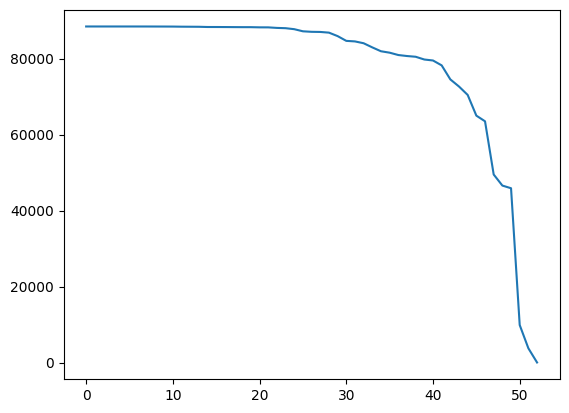

In [9]:
# Assuming traffic_road_df is your DataFrame
import pandas as pd

rank_road_list = []

for col in traffic_road_df.columns:
    if "road" in col:
        road_counts = traffic_road_df[col].value_counts()
        most_frequent_value = road_counts.idxmax()
        rank_road_list.append(
            (col, most_frequent_value, road_counts[most_frequent_value])
        )

# Sort the list based on the count of 0 in descending order
rank_road_list.sort(key=lambda x: x[2], reverse=True)

# Print the ranked list
rank_road_data = []
for road_info in rank_road_list:
    rank_road_data.append(road_info[2])

    print(
        f"Column: {road_info[0]}, Most Frequent Value: {road_info[1]}, Count of 0: {road_info[2]}"
    )
# plot road_info[2]
import matplotlib.pyplot as plt
import numpy as np

plt.plot(rank_road_data)

In [10]:
selected_road_column = [
    "road_length_path",
    "road_length_bus_stop",
    "road_length_track",
    "road_length_trunk",
    "road_length_primary",
    "road_length_footway",
    "road_length_secondary",
    "road_length_tertiary",
    "road_length_unclassified",
    "road_length_service",
    "road_length_residential",
]

In [11]:
# all column that not have road in the name
selected_column = traffic_road_df.columns.drop(
    list(traffic_road_df.filter(regex="road"))
).to_list()
selected_column.remove("grid_lat_id")
selected_column.remove("grid_lon_id")

display(selected_column)
selected_column = selected_column + selected_road_column
display(selected_column)

['store_id',
 'circle_range',
 'green_wkday_12',
 'orange_wkday_12',
 'red_wkday_12',
 'maroon_wkday_12',
 'green_wkday_18',
 'orange_wkday_18',
 'red_wkday_18',
 'maroon_wkday_18',
 'green_wkend_12',
 'orange_wkend_12',
 'red_wkend_12',
 'maroon_wkend_12',
 'green_wkend_18',
 'orange_wkend_18',
 'red_wkend_18',
 'maroon_wkend_18']

['store_id',
 'circle_range',
 'green_wkday_12',
 'orange_wkday_12',
 'red_wkday_12',
 'maroon_wkday_12',
 'green_wkday_18',
 'orange_wkday_18',
 'red_wkday_18',
 'maroon_wkday_18',
 'green_wkend_12',
 'orange_wkend_12',
 'red_wkend_12',
 'maroon_wkend_12',
 'green_wkend_18',
 'orange_wkend_18',
 'red_wkend_18',
 'maroon_wkend_18',
 'road_length_path',
 'road_length_bus_stop',
 'road_length_track',
 'road_length_trunk',
 'road_length_primary',
 'road_length_footway',
 'road_length_secondary',
 'road_length_tertiary',
 'road_length_unclassified',
 'road_length_service',
 'road_length_residential']

In [12]:
selected_traffic_road_df = traffic_road_df[selected_column]
selected_traffic_road_df.columns

Index(['store_id', 'circle_range', 'green_wkday_12', 'orange_wkday_12',
       'red_wkday_12', 'maroon_wkday_12', 'green_wkday_18', 'orange_wkday_18',
       'red_wkday_18', 'maroon_wkday_18', 'green_wkend_12', 'orange_wkend_12',
       'red_wkend_12', 'maroon_wkend_12', 'green_wkend_18', 'orange_wkend_18',
       'red_wkend_18', 'maroon_wkend_18', 'road_length_path',
       'road_length_bus_stop', 'road_length_track', 'road_length_trunk',
       'road_length_primary', 'road_length_footway', 'road_length_secondary',
       'road_length_tertiary', 'road_length_unclassified',
       'road_length_service', 'road_length_residential'],
      dtype='object')

In [13]:
values_column = selected_traffic_road_df.columns.drop(["store_id", "circle_range"])
store_id_column = selected_traffic_road_df["store_id"]

collapse_traffic_df = (
    selected_traffic_road_df.groupby(["store_id", "circle_range"])
    .agg({col: "sum" for col in values_column})
    .unstack(fill_value=0)
    .reset_index()
)

# Flatten the column names
collapse_traffic_df.columns = [
    "{}_cr_{}".format(col[0], col[1]) if col[1] != "" else col[0]
    for col in collapse_traffic_df.columns.values
]

# Add missing store_id column
# collapse_traffic_df.insert(0, "store_id", store_id_column.unique())

In [14]:
print(collapse_traffic_df.shape)
print(collapse_traffic_df.columns)

(11055, 217)
Index(['store_id', 'green_wkday_12_cr_0', 'green_wkday_12_cr_1',
       'green_wkday_12_cr_2', 'green_wkday_12_cr_3', 'green_wkday_12_cr_4',
       'green_wkday_12_cr_5', 'green_wkday_12_cr_6', 'green_wkday_12_cr_7',
       'orange_wkday_12_cr_0',
       ...
       'road_length_service_cr_6', 'road_length_service_cr_7',
       'road_length_residential_cr_0', 'road_length_residential_cr_1',
       'road_length_residential_cr_2', 'road_length_residential_cr_3',
       'road_length_residential_cr_4', 'road_length_residential_cr_5',
       'road_length_residential_cr_6', 'road_length_residential_cr_7'],
      dtype='object', length=217)


In [15]:
# save to csv
save_path = "/Users/user/Documents/Coding/cro_location_intelligence/src/data/traffic_road_data.csv"
collapse_traffic_df.to_csv(save_path, index=False)

In [17]:
data_path = "data/7 B for Ford.xlsx"
df_dict = pd.read_excel(data_path, sheet_name=None)

In [18]:
train_df = df_dict["Train new"]
test_df = df_dict["Test2022"]
print("train_df", train_df.shape)
print("test_df", test_df.shape)

train_df (26835, 194)
test_df (69, 192)


In [19]:
train_df = train_df.merge(collapse_traffic_df, on="store_id", how="left")
# check nan
print(train_df.isna().sum().sum())
train_df.shape

25868


(26835, 410)

In [20]:
test_df = test_df.merge(collapse_traffic_df, on="store_id", how="left")
# check nan
print(test_df.isna().sum().sum())
if test_df.isna().sum().sum() != 0:
    # find that column
    print(test_df.columns[test_df.isna().any()].tolist())
# drop['Unnamed: 2']

test_df.shape

69
['Unnamed: 2']


(69, 408)

(array([ 2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 10.,  5.,  8.,
        11., 11., 13., 17., 20., 26., 23., 30., 25., 23., 27., 31., 29.,
        40., 41., 27., 49., 35., 37., 23., 31., 21., 23., 28., 23., 17.,
        16., 23., 16., 13., 15.,  8., 13.,  9., 13., 11.,  9.,  8., 11.,
         8.,  8.,  9.,  5., 10.,  4.,  3.,  3.,  6.,  2.,  4.,  5.,  3.,
         3.,  3.,  4.,  1.,  3.,  3.,  3.,  2.,  2.,  1.,  1.,  0.,  3.,
         0.,  2.,  3.,  3.,  3.,  1.,  3.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([0.02091115, 0.02678851, 0.03266587, 0.03854323, 0.04442059,
        0.05029795, 0.0561753 , 0.06205266, 0.06793002, 0.07380738,
        0.07968474, 0.0855621 , 0.09143945, 0.09731681, 0.10319417,
        0.10907153, 0.11494889, 0.12082625, 0.1267036 , 0.13258096,
        0.13845832, 0.14433568, 0.15021304, 0.1560904 , 0.16196775,
        0.16784511, 0.17372247, 0.17959983, 0.18547719, 0.19135455,
        0.1972319 , 0.2031

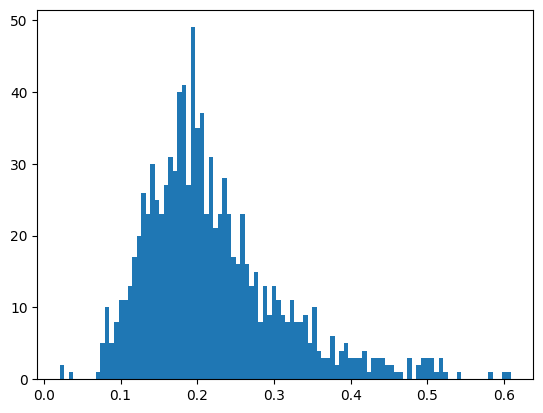

In [21]:
y_nor = train_df["y_nor"]
# plot histogram
import matplotlib.pyplot as plt

plt.hist(y_nor, bins=100)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 0.,
        0., 3., 1., 0., 1., 0., 2., 3., 2., 4., 2., 1., 1., 0., 0., 1., 0.,
        3., 3., 3., 1., 0., 3., 1., 2., 3., 2., 3., 0., 3., 0., 0., 0., 1.,
        2., 2., 2., 0., 1., 3., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.00203283,  0.00507167,  0.01217617,  0.01928068,  0.02638518,
         0.03348968,  0.04059419,  0.04769869,  0.05480319,  0.06190769,
         0.0690122 ,  0.0761167 ,  0.0832212 ,  0.0903257 ,  0.09743021,
         0.10453471,  0.11163921,  0.11874372,  0.12584822,  0.13295272,
         0.14005722,  0.14716173,  0.15426623,  0.16137073,  0.16847523,
         0.17557974,  0.18268424,  0.18978874,  0.19689325,  0.20399775,
         0.21110225,  0.21820675,  0.22531126,  0.23241576,  0.23952026,
         0.24662477,  0.25372927,  0.26

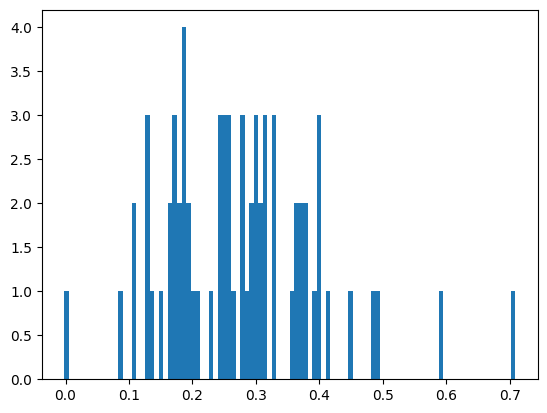

In [22]:
y_nor = test_df["y_nor"]
# plot histogram
import matplotlib.pyplot as plt

plt.hist(y_nor, bins=100)

In [23]:
diff_columns = test_df.columns.difference(train_df.columns)
diff_columns

Index(['Unnamed: 2'], dtype='object')

In [24]:
# drop diff_columns
test_df = test_df.drop(columns=diff_columns)

In [25]:
print("train_df", train_df.shape)
print("test_df", test_df.shape)

train_df (26835, 410)
test_df (69, 407)


In [26]:
# try to convert all columns to float
fail_to_convert_list = []
for col in train_df.columns:
    try:
        train_df[col] = train_df[col].astype(float)
    except:
        fail_to_convert_list.append(col)
print("fail_to_convert_list", fail_to_convert_list)

fail_to_convert_list ['prov_namt', 'open_dt', 'store_franchise', 'zone_code']


In [27]:
# drop open dt
train_df = train_df.drop(columns=["open_dt"])
test_df = test_df.drop(columns=["open_dt"])

In [28]:
# create one hot encoding for categorical columns
categorical_columns = ["prov_namt", "store_franchise", "zone_code"]
for col in categorical_columns:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

# create one hot encoding for categorical columns
train_df = pd.get_dummies(train_df, columns=categorical_columns)
test_df = pd.get_dummies(test_df, columns=categorical_columns)

In [29]:
# check is any columns unique ==1
unique_columns = []
for col in train_df.columns:
    if len(train_df[col].unique()) == 1:
        unique_columns.append(col)
print("unique_columns", unique_columns)
# drop unique_columns
train_df = train_df.drop(columns=unique_columns)
# check is unique_columns in test_df then drop
for col in unique_columns:
    if col in test_df.columns:
        test_df = test_df.drop(columns=[col])

unique_columns ['POIs_utern_50m', 'POIs_utern_200m', 'POIs_utern_300m', 'POIs_utern_500m', 'POIs_utern_1000m', 'POIs_utern_2000m', 'strategic_location_เขตเศรษฐกิจพิเศษ', 'CRO_store_franchise_NDF', 'year']


In [30]:
print("train_df", train_df.shape)
print("test_df", test_df.shape)

train_df (26835, 413)
test_df (69, 401)


In [31]:
duplicated_columns = train_df.columns[train_df.T.duplicated(keep=False)]

if len(duplicated_columns) > 0:
    print("There are duplicate columns with the same values:")
    print(duplicated_columns)
else:
    print("No duplicate columns found.")

There are duplicate columns with the same values:
Index(['cro_open_year', 'open_date_year', 'CRO_store_franchise_PTTOR',
       'store_franchise_PTTOR'],
      dtype='object')


In [32]:
drop_columns = ["open_date_year", "store_franchise_PTTOR"]
train_df = train_df.drop(columns=drop_columns)
test_df = test_df.drop(columns=drop_columns)

In [33]:
# get min year from cro_open_year
min_year = train_df["cro_open_year"].min()
print("min_year", min_year)
train_df["cro_open_year"] = train_df["cro_open_year"] - 2000
test_df["cro_open_year"] = test_df["cro_open_year"] - 2000

min_year 2016.0


In [34]:
# save data to csv
train_df.to_csv("data/train.csv", index=False)
test_df.to_csv("data/test.csv", index=False)

In [35]:
# all_data
train_df["subset"] = "train"
test_df["subset"] = "test"
all_data = pd.concat([train_df, test_df], axis=0)
all_data.to_csv("data/all_data.csv", index=False)

In [36]:
all_data.shape

(26904, 412)

In [ ]:
"""บริษัท เบทาโกร จำกัด (มหาชน) หรือ BTG รายงานผลดำเนินงานผ่านตลาดหลักทรัพย์แห่งประเทศไทย (ตลท.) ว่า ไตรมาส 2 ปี 2566 พลิกขาดทุน 350.6 ล้านบาท ลดลง 118.8% จากช่วงเดียวกันปีก่อนที่มีกำไรสุทธิ 1,868.9 ล้านบาท 
โดยบริษัทมีรายได้รวม 26,661.8 ล้านบาท ลดลง 5.1% จาก 28,108.0 ล้านบาท ในไตรมาส 2/65 มาจากการลดลงของรายได้การขายสินค้าและให้บริการในกลุ่มธุรกิจอาหารและโปรตีน ซึ่งได้รับผลกระทบจากราคาสุกรในประเทศที่ปรับลดลงอย่างมีนัยสำคัญจากการลักลอบนำเข้าชิ้นส่วนและเนื้อสุกรผิดกฎหมาย แม้ว่าปริมาณการขายจะเพิ่มขึ้นตามแผนการขยายกำลังผลิต
EBITDA ในไตรมาส 2/66 อยู่ที่ระดบั 901.0 ล้านบาท ลดลง 74.4% จาก 3,517.4 ล้านบาท ในไตรมาส 2/65 โดยบริษัทฯ มีอัตรา EBITDA อยู่ที่ 3.4% ในไตรมาส 2/66 ลดลงจาก 12.5% ในไตรมาส 2/65
ส่วนงวด 6 เดือนแรกปี 66 มีกำไรสุทธิ 42.18 ล้านบาท ลดลง 98.9% จากช่วงเดียวกันปีก่อนมีกำไรสุทธิ 3,838.94 ล้านบาท โดยมีรายได้รวม 54,621.5 ล้านบาท เพิ่มขึ้น 1.0% จาก 54,090.5 ล้านบาท เป็นผลมาจากการเติบโตของรายได้จากการขายสินค้าและการให้บริการของ (1) กลุ่มธุรกิจเกษตร จากการเพิ่มขึ้นของราคาขายสินค้า ตามการเพิ่มขึ้นของต้นทุนวัตถุดิบอาหารสัตว์
ขณะที่ปริมาณขายเพิ่มขึ้นตามความต้องการสินค้าที่เพิ่มขึ้น สอดคล้องกับการขยายกำลังการผลิต (2) กลุ่มธุรกิจต่างประเทศ จากปริมาณขายอาหารแปรรูปและเนื้อสัตว์แปรรูปที่เพิ่มขึ้น ทั้งในประเทศกัมพูชาและลาว และ (3) กลุ่มธุรกิจสัตว์เลี้ยง จากการเพิ่มขึ้นของราคาขายอาหารสัตว์เลี้ยง สอดคล้องกับการเพิ่มขึ้นของสัดส่วนรายได้การขายผลิตภัณฑ์ที่มีราคาสูงขึ้น
โดย EBITDA อยู่ที่ระดับ 2,728.1 ล้านบาท ลดลง 60.9% จาก 6,981.2 ล้านบาท ในช่วงเดียวกันปีก่อน มีอัตรา EBITDA อยู่ที่ 5.0% ลดลงจาก 12.9% ในช่วงเดียวกันปีก่อน"""

'บริษัท เบทาโกร จำกัด (มหาชน) หรือ BTG รายงานผลดำเนินงานผ่านตลาดหลักทรัพย์แห่งประเทศไทย (ตลท.) ว่า ไตรมาส 2 ปี 2566 พลิกขาดทุน 350.6 ล้านบาท ลดลง 118.8% จากช่วงเดียวกันปีก่อนที่มีกำไรสุทธิ 1,868.9 ล้านบาท\xa0\nโดยบริษัทมีรายได้รวม 26,661.8 ล้านบาท ลดลง 5.1% จาก 28,108.0 ล้านบาท ในไตรมาส 2/65 มาจากการลดลงของรายได้การขายสินค้าและให้บริการในกลุ่มธุรกิจอาหารและโปรตีน ซึ่งได้รับผลกระทบจากราคาสุกรในประเทศที่ปรับลดลงอย่างมีนัยสำคัญจากการลักลอบนำเข้าชิ้นส่วนและเนื้อสุกรผิดกฎหมาย แม้ว่าปริมาณการขายจะเพิ่มขึ้นตามแผนการขยายกำลังผลิต\nEBITDA ในไตรมาส 2/66 อยู่ที่ระดบั 901.0 ล้านบาท ลดลง 74.4% จาก 3,517.4 ล้านบาท ในไตรมาส 2/65 โดยบริษัทฯ มีอัตรา EBITDA อยู่ที่ 3.4% ในไตรมาส 2/66 ลดลงจาก 12.5% ในไตรมาส 2/65\nส่วนงวด 6 เดือนแรกปี 66 มีกำไรสุทธิ 42.18 ล้านบาท ลดลง 98.9% จากช่วงเดียวกันปีก่อนมีกำไรสุทธิ 3,838.94 ล้านบาท โดยมีรายได้รวม 54,621.5 ล้านบาท เพิ่มขึ้น 1.0% จาก 54,090.5 ล้านบาท เป็นผลมาจากการเติบโตของรายได้จากการขายสินค้าและการให้บริการของ (1) กลุ่มธุรกิจเกษตร จากการเพิ่มขึ้นของราคาขายสินค้า ต